## Huff, Puff & Classify
### Example Notebook: Fuzzy String Classification

#### User Globals

##### User should only modify basic settings unless they have received advanced training on this module from developers. 

Basic settings can be used in order to select which variable the user wants to predict values for and which survey types to analyze. 

The default setting will be "housing_roof", which means that the user can provide a dataset with string values for housing roof and then predict the quality ranking as "housing_roof_rank" for these values. The user can change this value to "housing_wall" or "housing_floor" in order to predict quality of those levels.

The default survey filter setting is MACRO DHS surveys, which are the gold standard for this data and easiest to work with.


#### Basic Settings

In [ ]:
#which variable do you want to analyze the strings in order to classify quality (currently: floor/wall/roof)
DEP_VAR = "housing_roof"

#setup a filter to select which surveys you want to work with
SVY_FILTER = ['MACRO_DHS']

#### Advanced Settings

Please exercise caution editing the below cell without advanced training. This cell provides the ability for the user to change more advanced options, including options that pertain to the column naming structure of the input data (which should be unmodified if using the example data) and analytical options pertaining to the type of cross-validation being done. In the interest of time for a basic example, the cross-validation provided here will only use 2 folds.

Below the user can also modify the types of garbage code values that will be cleaned from the dataset. These values do not have a meaningful relationship with quality and so will not be used in the analysis.

In [2]:
#script options
WRITE_FILES = False #do you want to write output csvs of results?

#setup lists of vars to work with
STR_VARS = ['housing_roof', 'housing_wall', 'housing_floor']
NUM_VARS = [s + '_num' for s in STR_VARS]
RANK_VARS = [s + '_rank' for s in STR_VARS]

#which variable do you want to predict (currently: floor/wall/roof)
#note that this rank variable inherits from the user defined dependent (string) var
#changes here should only be done if the column names have been modified
PRED_VAR = DEP_VAR + "_rank" #will always be using the strings to predict ranking

#analytical options
CV_SAMPLE_PCT = .2 #hold out x% for testing
CV_SAMPLE_WT = "N" #which variable(if any) shall weight your test sample
CV_FOLDS = 2 #use a x-fold cross-validation env

#garbage lists
STR_GARBAGE = ['nan', 'other', 'not a dejure resident', 'not dejure resident']
RANK_GARBAGE = ['4', '5', '6', '7', '8', '9', 'n']

#dictionaries
PRED_DICT = {'natural':'1', 'rudimentary':'2', 'finished':'3'} #map categories back to ranks

#### Package imports and setup

In [ ]:
#import packages
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import seaborn as sns
import sys

#import custom modules
sys.path.append('../hp_classify')
import prep.prep_data as prep
import prep.prep_cv as cv
import model.fuzzy as fz
import model.cv as fzcv

#magik
%matplotlib inline

In [ ]:
#setup directories
CWD = os.getcwd()
HOME_DIR = os.path.abspath(os.path.join(CWD, os.pardir))
DATA_DIR = HOME_DIR + "/data"
DATA_FILENAME = "housing_data.csv"
RESULTS_DIR = HOME_DIR + "/results"

#### Read in and prep the data

In [3]:
#read in data and clean the text, then subset to our gold standard MACRO DHS data
df = prep.read_then_clean(DATA_DIR + "/" + DATA_FILENAME, STR_VARS, SVY_FILTER)

#remove garbage codes from our string variables
df_clean = prep.remove_garbage_codes(df, STR_VARS, STR_GARBAGE)

#extract ranking values for roof/wall/floor, then remove non-informative values
#note that we only want to use ranks from 1-3, as these correspond to our final output ranks
df_clean = prep.extract_ranking(df_clean, NUM_VARS)
df_clean = prep.remove_garbage_codes(df_clean, RANK_VARS, RANK_GARBAGE)

~begin reading
data read!
~begin cleaning
data clean!
~applying filter
{'nan': nan, 'other': nan, 'not a dejure resident': nan, 'not dejure resident': nan}
removing garbage from  housing_roof
removing garbage from  housing_wall
removing garbage from  housing_floor
defining ranking for  housing_roof_num
defining ranking for  housing_wall_num
defining ranking for  housing_floor_num
{'4': nan, '5': nan, '6': nan, '7': nan, '8': nan, '9': nan, 'n': nan}
removing garbage from  housing_roof_rank
removing garbage from  housing_wall_rank
removing garbage from  housing_floor_rank


#### Run a bifold cross validation exercise for "housing roof"
##### Since this is an example, we will only work on 25 unknown words from each cross-validation

In [5]:
#setup training/test data for a bifold cross validation, using the 'housing roof" variable to predict 
#train_list = cv.cv_censor_col(df_clean, PRED_VAR, CV_SAMPLE_PCT, CV_SAMPLE_WT, CV_FOLDS)

#run bifold cross validation for "housing roof"
#run your cross-validation analysis
cv_distrib, cv_preds, cv_results, cv_df = fzcv.fuzzy_cv(train_list, DEP_VAR, PRED_DICT,
                                                        subset=range(25), #only run on 25 words from each CV for speed
                                                        jupyter=True) #display jupyter progress bar

#output the results to csv
if WRITE_FILES == True:
    save_results_df(cv_results, out_dir, "ex_cv_results")
    save_results_df(cv_preds, out_dir, "ex_cv_preds")
    save_results_df(cv_df, out_dir, "ex_cv_df")
    save_results_df(cv_distrib, out_dir, "ex_cv_distrib")

working on cv loop # 0
building corpus for rank # 1
building corpus for rank # 2
building corpus for rank # 3
extracting unknown strings


classifying unknown strings:   0%|          | 0/25 [00:00<?, ?it/s]

need to classify 278 unknown strings
analyzing... cement bricks
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:   4%|▍         | 1/25 [00:35<14:02, 35.11s/it]

analyzing... sod mud with grass
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:   8%|▊         | 2/25 [01:14<13:59, 36.51s/it]

analyzing... thatch bushes grass
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  12%|█▏        | 3/25 [01:50<13:17, 36.27s/it]

analyzing... wood planks
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  16%|█▌        | 4/25 [02:25<12:34, 35.93s/it]

analyzing... wood timber
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  20%|██        | 5/25 [03:03<12:10, 36.54s/it]

analyzing... ceramic tiles
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  24%|██▍       | 6/25 [03:43<11:51, 37.44s/it]

analyzing... roofing shingles
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  28%|██▊       | 7/25 [04:17<10:54, 36.36s/it]

analyzing... rustic mat mud with hay
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  32%|███▏      | 8/25 [04:56<10:36, 37.42s/it]

analyzing... metal
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  36%|███▌      | 9/25 [05:31<09:42, 36.44s/it]

analyzing... cement
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  40%|████      | 10/25 [06:12<09:28, 37.90s/it]

analyzing... mud and hay
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  44%|████▍     | 11/25 [06:51<08:54, 38.19s/it]

analyzing... calamine cement fiber
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  48%|████▊     | 12/25 [07:33<08:32, 39.45s/it]

analyzing... wood
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  52%|█████▏    | 13/25 [08:05<07:26, 37.18s/it]

analyzing... rustic mat
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  56%|█████▌    | 14/25 [08:56<07:35, 41.42s/it]

analyzing... cardboard cloth tent
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  60%|██████    | 15/25 [09:44<07:11, 43.16s/it]

analyzing... grass palm
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  64%|██████▍   | 16/25 [10:28<06:32, 43.62s/it]

analyzing... zinc plates
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  68%|██████▊   | 17/25 [11:04<05:30, 41.26s/it]

analyzing... no roof
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  72%|███████▏  | 18/25 [11:40<04:37, 39.60s/it]

analyzing... palm bamboo
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  76%|███████▌  | 19/25 [12:17<03:53, 38.94s/it]

analyzing... concrete slab
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  80%|████████  | 20/25 [12:58<03:16, 39.38s/it]

analyzing... cardboard
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  84%|████████▍ | 21/25 [13:40<02:41, 40.32s/it]

analyzing... tiles
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  88%|████████▊ | 22/25 [14:26<02:06, 42.11s/it]

analyzing... reinforced concrete
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  92%|█████████▏| 23/25 [15:07<01:23, 41.70s/it]

analyzing... tuale tarred roofing paper
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  96%|█████████▌| 24/25 [15:57<00:44, 44.16s/it]

analyzing... concrete panels
~>corpus# 0
~>corpus# 1
~>corpus# 2


working on cv loop # 1
building corpus for rank # 1
building corpus for rank # 2
building corpus for rank # 3


classifying unknown strings:   0%|          | 0/25 [00:00<?, ?it/s]

extracting unknown strings
need to classify 283 unknown strings
analyzing... ceramic tiles
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:   4%|▍         | 1/25 [00:42<16:49, 42.04s/it]

analyzing... sod mud with grass
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:   8%|▊         | 2/25 [01:21<15:46, 41.13s/it]

analyzing... wood timber
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  12%|█▏        | 3/25 [01:58<14:42, 40.10s/it]

analyzing... cement bricks
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  16%|█▌        | 4/25 [02:39<14:06, 40.31s/it]

analyzing... roofing shingles
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  20%|██        | 5/25 [03:14<12:51, 38.59s/it]

analyzing... wood planks
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  24%|██▍       | 6/25 [03:50<12:02, 38.04s/it]

analyzing... thatch bushes grass
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  28%|██▊       | 7/25 [04:35<11:59, 39.99s/it]

analyzing... rustic mat mud with hay
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  32%|███▏      | 8/25 [05:21<11:53, 41.96s/it]

analyzing... cement
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  36%|███▌      | 9/25 [06:03<11:10, 41.88s/it]

analyzing... mud and hay
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  40%|████      | 10/25 [06:40<10:04, 40.30s/it]

analyzing... rustic mat
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  44%|████▍     | 11/25 [07:22<09:30, 40.77s/it]

analyzing... metal
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  48%|████▊     | 12/25 [07:55<08:20, 38.49s/it]

analyzing... wood
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  52%|█████▏    | 13/25 [08:27<07:18, 36.52s/it]

analyzing... calamine cement fiber
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  56%|█████▌    | 14/25 [09:07<06:53, 37.62s/it]

analyzing... no roof
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  60%|██████    | 15/25 [09:46<06:21, 38.11s/it]

analyzing... zinc plates
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  64%|██████▍   | 16/25 [10:23<05:39, 37.68s/it]

analyzing... concrete slab
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  68%|██████▊   | 17/25 [11:05<05:12, 39.11s/it]

analyzing... grass palm
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  72%|███████▏  | 18/25 [11:48<04:40, 40.10s/it]

analyzing... tiles
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  76%|███████▌  | 19/25 [12:28<04:00, 40.15s/it]

analyzing... cardboard
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  80%|████████  | 20/25 [13:11<03:24, 40.98s/it]

analyzing... palm bamboo
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  84%|████████▍ | 21/25 [13:48<02:39, 39.94s/it]

analyzing... reinforced concrete
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  88%|████████▊ | 22/25 [14:30<02:00, 40.33s/it]

analyzing... tuale tarred roofing paper
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  92%|█████████▏| 23/25 [15:28<01:31, 45.74s/it]

analyzing... concrete panels
~>corpus# 0
~>corpus# 1
~>corpus# 2


classifying unknown strings:  96%|█████████▌| 24/25 [16:09<00:44, 44.22s/it]

analyzing... ruberoid asbest
~>corpus# 0
~>corpus# 1
~>corpus# 2


#### Results

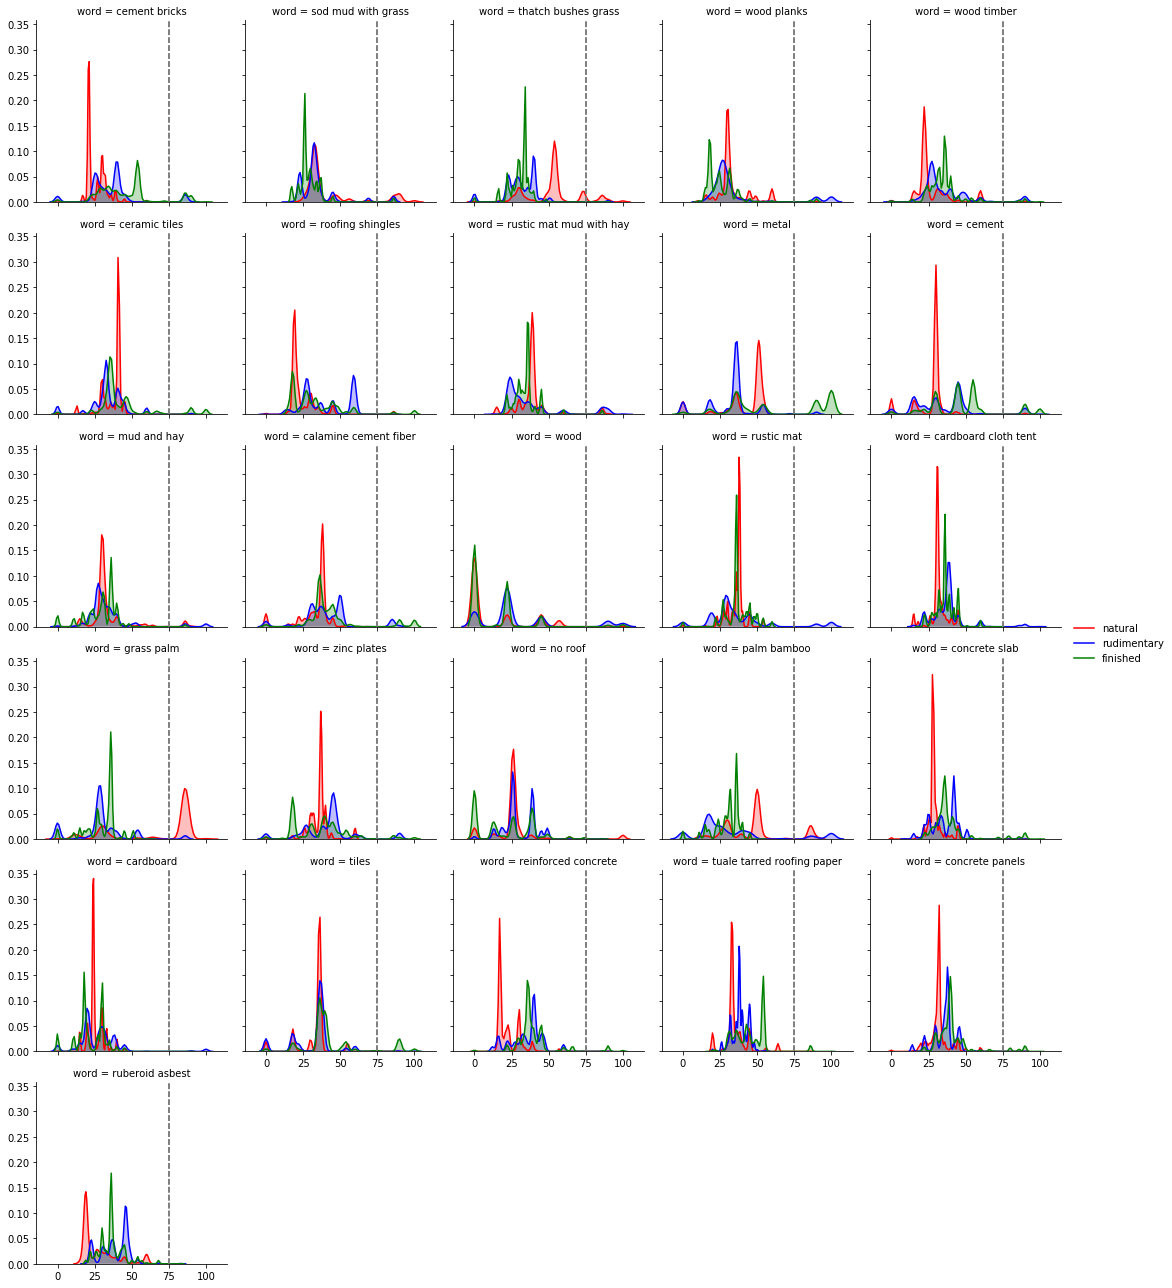

In [6]:
#plot results
fz.fuzzy_density(pd.concat(cv_distrib), 'word', 
                 ['natural', 'rudimentary', 'finished'],
                 color_list={'natural':'r', 'rudimentary':'b', 'finished':'g'},
                 cutoff=75)